In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

EDA

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
summary = pd.DataFrame({
    "Features": train.columns,
    "Unique Values": [train[col].nunique() for col in train.columns],
    "Missing Values": [train[col].isnull().sum() for col in train.columns],
    "Dtype": [train[col].dtype for col in train.columns]
})

summary

,Features,Unique Values,Missing Values,Dtype
0,PassengerId,891,0,int64
1,Survived,2,0,int64
2,Pclass,3,0,int64
3,Name,891,0,object
4,Sex,2,0,object
5,Age,88,177,float64
6,SibSp,7,0,int64
7,Parch,7,0,int64
8,Ticket,681,0,object
9,Fare,248,0,float64


In [6]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

객실 등급 / 성별 / 승선지 → 생존 여부

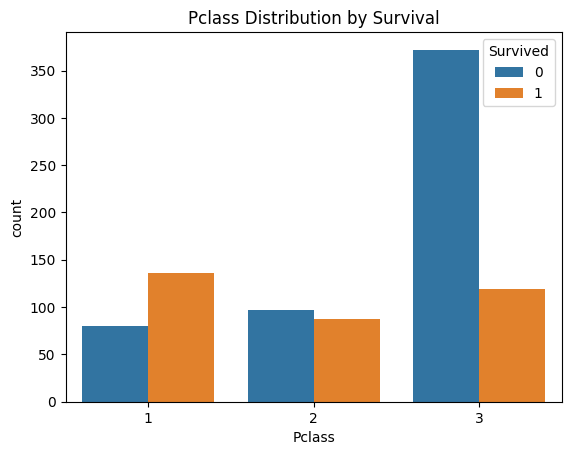

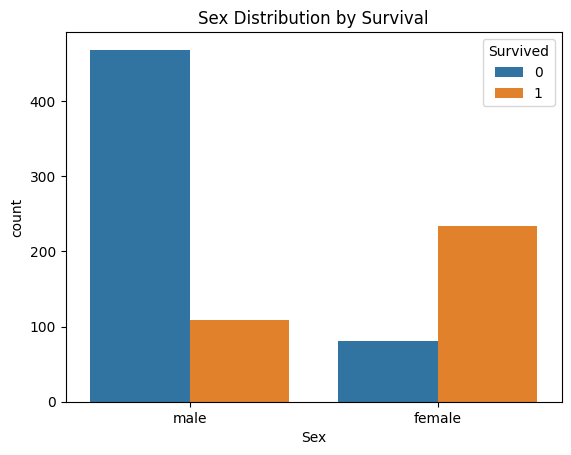

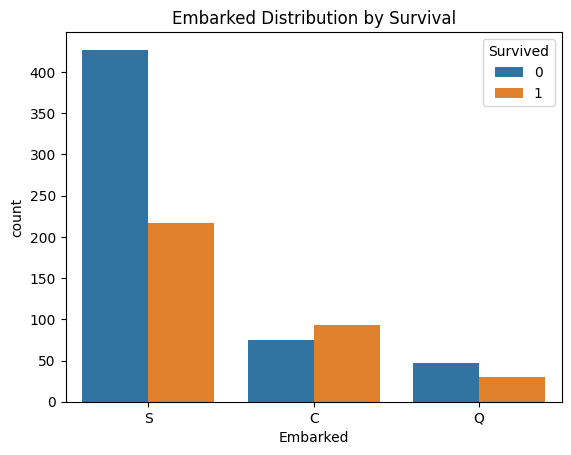

In [7]:
categorical_cols = ['Pclass', 'Sex', 'Embarked']
target_col = 'Survived'

for col in categorical_cols:
    sns.countplot(data=train, x=col, hue=target_col)
    plt.title(f"{col} Distribution by Survival")
    plt.show()

요금(Fare)과 생존의 관계

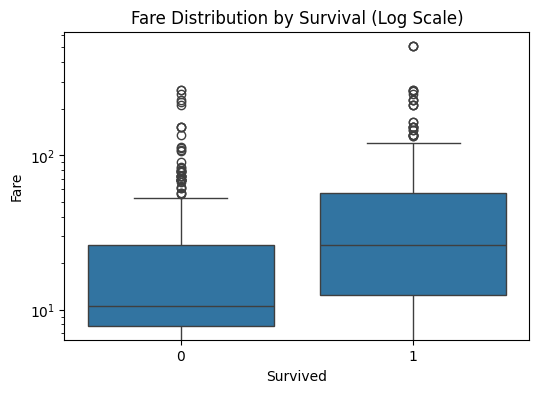

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=train, x='Survived', y='Fare')
plt.yscale('log')
plt.title("Fare Distribution by Survival (Log Scale)")
plt.show()

나이 분포 vs 생존 (단변량 시각화)

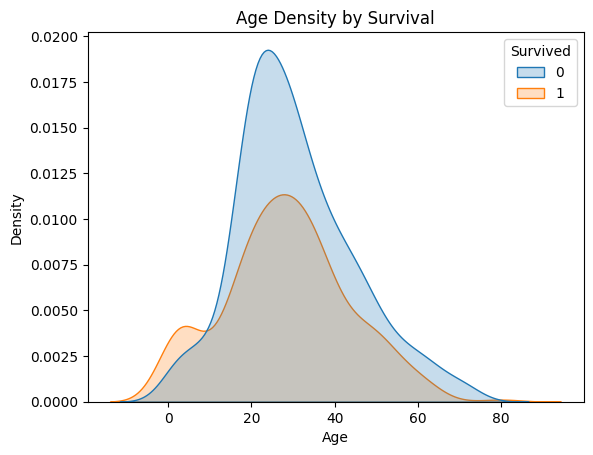

In [9]:
sns.kdeplot(data=train, x="Age", hue="Survived", fill=True)
plt.title("Age Density by Survival")
plt.show()

나이와 성별이 결합되면 생존율에 어떤 상호작용이 있는가?

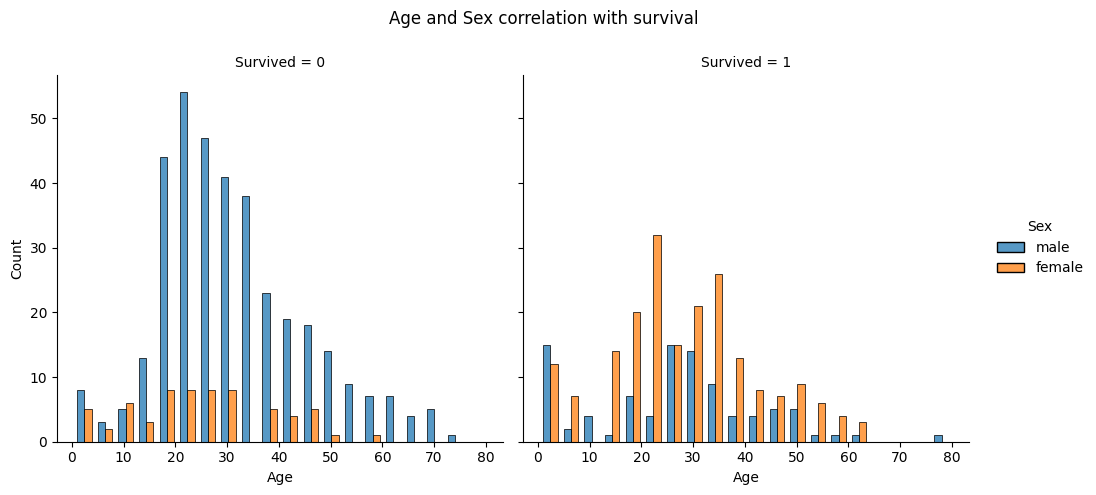

In [10]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

g = sns.displot(
    data = train[train['Age'].notna()],
    x = 'Age',
    hue = 'Sex',
    col = target_col,
    multiple = 'dodge',
    shrink = 0.7
)

g.fig.suptitle('Age and Sex correlation with survival')
plt.subplots_adjust(top=0.85)

plt.show()

클래스(Pclass) × 성별(Sex) × 생존(Survived)

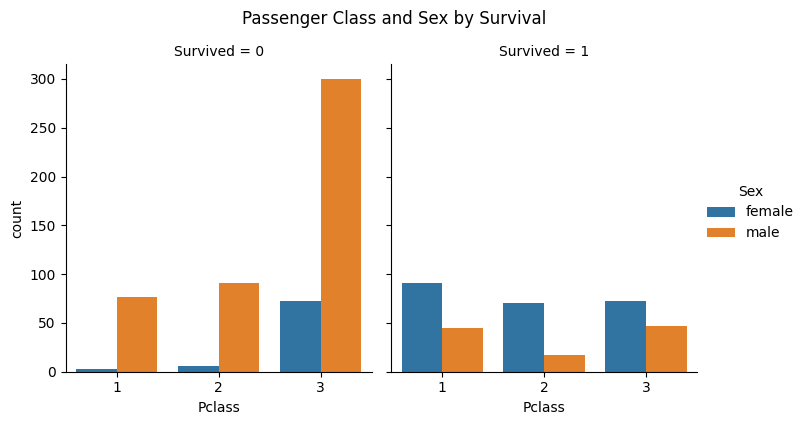

In [11]:
g = sns.catplot(
    data=train,
    x="Pclass",
    hue="Sex",
    col="Survived",
    kind="count",
    height=4,
    aspect=0.9
)
g.fig.suptitle("Passenger Class and Sex by Survival", y=1.05)
plt.show()

지위에 따른 생존률 차이

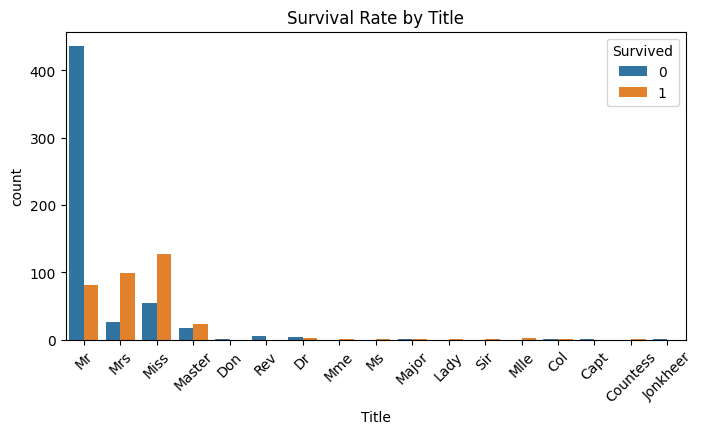

In [12]:
# Title 추출
train["Title"] = train["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

plt.figure(figsize=(8,4))
sns.countplot(data=train, x="Title", hue="Survived")
plt.title("Survival Rate by Title")
plt.xticks(rotation=45)
plt.show()

탑승항구별 생존률 차이

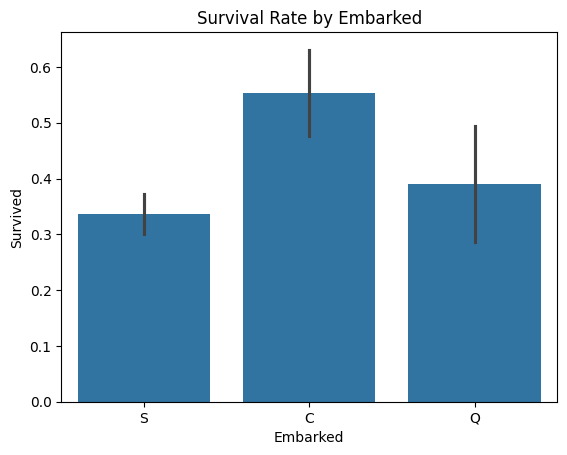

In [16]:
sns.barplot(
    data=train,
    x="Embarked",
    y="Survived",
    estimator=np.mean
)
plt.title("Survival Rate by Embarked")
plt.show()

FamilySize vs Survived

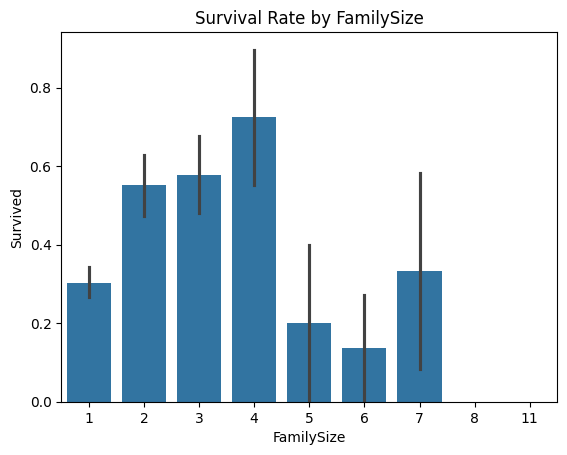

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

sns.barplot(
    data=train,
    x="FamilySize",
    y="Survived",
    estimator=np.mean
)
plt.title("Survival Rate by FamilySize")
plt.show()
